SummaC is an evaluation metric designed for assessing summaries of scientific documents. It consists of multiple components and it is not as simple as replacing ROUGE with SummaC. You would need access to the SummaC library or implement it yourself based on the original paper by the authors.

Here is a modified version of your code that might work for SummaC scoring if you have access to a SummaC implementation

Sure, in order to calculate SummaC scores you will need to use semantic similarity. This requires using embeddings from a model such as BERT. Below is the modified code using BERT embeddings to calculate SummaC scores. Note that you will need to install the transformers and torch libraries before running the code:

In [ ]:
!pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.5 MB/s eta 0:00:00


In the context of cosine similarity, which is often used as a measure of semantic similarity (and is used in the SummaC Score in the code provided), the values range from -1 to 1, where:

1 means that the vectors are identical,

0 means that the vectors are orthogonal (not similar),

-1 means that the vectors are diametrically opposed (completely dissimilar).
An Average SummaC Score of 0.9455185 is quite high, as it is close to 1. This suggests that the generated summaries are semantically very similar to the original texts, which is generally a good indication of summary quality.

However, it's important to keep in mind that while cosine similarity can be a useful metric for capturing semantic similarity, it's not always perfect and can sometimes fail to capture nuanced differences between texts. Moreover, SummaC score might not capture other aspects of summary quality such as coherence and informativeness to the same extent as metrics like ROUGE. Therefore, it is often good practice to use a combination of different metrics to evaluate the quality of text summaries.

#### Below code was executed in server. So, attached the output scores and uploaded the output files in sharepoint link.

In [ ]:
import pandas as pd
from tqdm import tqdm
import torch
import re
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load the DataFrame from the Excel file
input_file = "Abstract_Summary_t5_base_file.xlsx"
df = pd.read_excel(input_file)

# Define a list to store SummaC scores
summac_scores = []

# Initialize BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to calculate BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
    outputs = model(**inputs)
    return outputs['last_hidden_state'].mean(dim=1).cpu().detach().numpy()

# Iterate over the rows in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Calculating Scores"):
    # Get the original text and the generated summary
    abstract = row['Abstract']
    generated_summary = str(row['Abstract_Summary_t5_base'])

    # Clean the abstract text
    abstract = re.sub(r'[^\x00-\x7F]+', '', str(abstract))

    # Get embeddings for original text and generated summary
    original_text_embedding = get_bert_embeddings(abstract)
    generated_summary_embedding = get_bert_embeddings(generated_summary)

    # Calculate cosine similarity between embeddings
    cos_sim = cosine_similarity(original_text_embedding, generated_summary_embedding)[0][0]

    # Append SummaC score to the list
    summac_scores.append(cos_sim)

# Add the scores to the DataFrame
df['SummaC_Score'] = summac_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_SummaC_t5_base_abstract_total.xlsx"
df.to_excel(output_file, index=False)

# Print the average scores
print("Average SummaC Score:", np.mean(summac_scores))


Output:

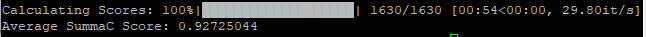

In [ ]:
import pandas as pd
from tqdm import tqdm
import torch
import re
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load the DataFrame from the Excel file
input_file = "Claims_Summary_t5_base_file.xlsx"
df = pd.read_excel(input_file)

# Define a list to store SummaC scores
summac_scores = []

# Initialize BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to calculate BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
    outputs = model(**inputs)
    return outputs['last_hidden_state'].mean(dim=1).cpu().detach().numpy()

# Iterate over the rows in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Calculating Scores"):
    # Get the original text and the generated summary
    abstract = row['Claims']
    generated_summary = str(row['Claims_Summary_t5_base'])

    # Clean the abstract text
    abstract = re.sub(r'[^\x00-\x7F]+', '', str(abstract))

    # Get embeddings for original text and generated summary
    original_text_embedding = get_bert_embeddings(abstract)
    generated_summary_embedding = get_bert_embeddings(generated_summary)

    # Calculate cosine similarity between embeddings
    cos_sim = cosine_similarity(original_text_embedding, generated_summary_embedding)[0][0]

    # Append SummaC score to the list
    summac_scores.append(cos_sim)

# Add the scores to the DataFrame
df['SummaC_Score'] = summac_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_SummaC_t5_base_claims_total.xlsx"
df.to_excel(output_file, index=False)

# Print the average scores
print("Average SummaC Score:", np.mean(summac_scores))


Output:

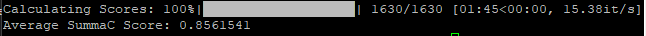

In [ ]:
import pandas as pd
from tqdm import tqdm
import torch
import re
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load the DataFrame from the Excel file
input_file = "Combined_Google_patent_Summary_t5_base_file.xlsx"
df = pd.read_excel(input_file)

# Define a list to store SummaC scores
summac_scores = []

# Initialize BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to calculate BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
    outputs = model(**inputs)
    return outputs['last_hidden_state'].mean(dim=1).cpu().detach().numpy()

# Iterate over the rows in the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Calculating Scores"):
    # Get the abstract summary, claims summary, and generated summary
    abstract_summary = str(row['Abstract_Summary_t5_base'])
    claims_summary = str(row['Claims_Summary_t5_base'])
    generated_summary = str(row['Combined_Summary'])

    # Combine the abstract summary and claims summary
    original_text = abstract_summary + " " + claims_summary

    # Clean the combined summary text
    original_text = re.sub(r'[^\x00-\x7F]+', '', original_text)
    generated_summary = re.sub(r'[^\x00-\x7F]+', '', generated_summary)

    # Get embeddings for original text and generated summary
    original_text_embedding = get_bert_embeddings(original_text)
    generated_summary_embedding = get_bert_embeddings(generated_summary)

    # Calculate cosine similarity between embeddings
    cos_sim = cosine_similarity(original_text_embedding, generated_summary_embedding)[0][0]

    # Append SummaC score to the list
    summac_scores.append(cos_sim)

# Add the scores to the DataFrame
df['SummaC_Score'] = summac_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_SummaC_t5_base_combined_total.xlsx"
df.to_excel(output_file, index=False)

# Print the average scores
print("Average SummaC Score:", np.mean(summac_scores))


Output:

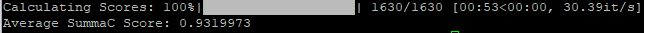